In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima import auto_arima

,Price,Change
Month,,
2000-04-01,0.98,-
2000-05-01,0.98,0.00 %
2000-06-01,0.94,-4.08 %
2000-07-01,0.90,-4.26 %
2000-08-01,0.84,-6.67 %


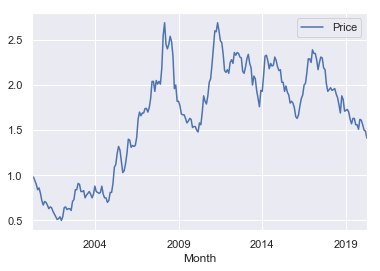

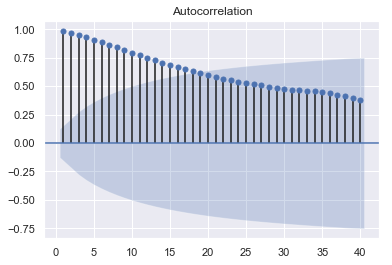

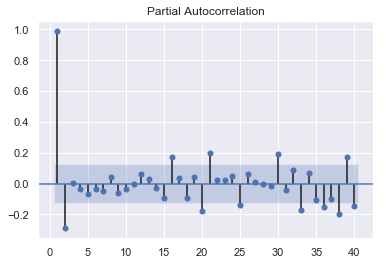

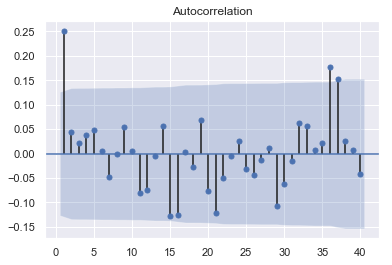

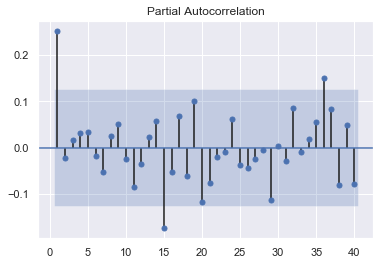

In [13]:
df = pd.read_csv('cofee.csv', index_col='Month', parse_dates=True)
df.plot()
sgt.plot_acf(df.Price, zero=False, lags=40)
sgt.plot_pacf(df.Price, zero=False, lags=40)
sgt.plot_acf(df.Price.diff(1).iloc[1:], zero=False, lags=40)
sgt.plot_pacf(df.Price.diff(1).iloc[1:], zero=False, lags=40)
df.head()

In [10]:
auto_arima(df.Price)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

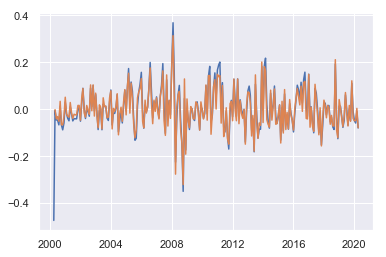

In [18]:
#model=ARIMA(df.Price,order=(1,1,0))
arma_model=ARMA(df.Price,order=(1,0))
arma_results=arma_model.fit()
arima_model=ARIMA(df.Price,order=(1,1,0))
arima_results=arima_model.fit()

plt.plot(arma_results.resid)
plt.plot(arima_results.resid);

In [23]:
from statistics import median
resid_comp = pd.DataFrame(data={
    'model': ['ARMA', 'ARIMA']
    , 'mean': [np.mean(arma_results.resid), np.mean(arima_results.resid)]
    , 'min': [min(arma_results.resid), min(arima_results.resid)]
    , 'max': [max(arma_results.resid), max(arima_results.resid)]
    , 'median': [median(arma_results.resid), median(arima_results.resid)]
})
resid_comp

,model,mean,min,max,median
0,ARMA,0.001942,-0.473617,0.368693,-0.007328
1,ARIMA,0.000002,-0.321030,0.313495,-0.008852


As can be seen above, the ARIMA model (1,1,0) is better here, having lower residual mean, lower min and max (meaning what's the wrongest the prediction will get).
ARMA model has a better median, but barely.